<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1tz78Dt8NFSgy0MfJvaciPMvPnszJJ2IW" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Eliminando ruido mediante filtros

En este notebook vamos a ver un ejemplo de cómo eliminar ruído por medio de filtros.

De paso también veremos como *ensuciar* una imagen.

In [1]:
import os
import cv2
import cv2
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files


## Algunas funciones de apoyo

In [2]:
def subir_imagen():
    # Pedir al usuario que seleccione un archivo
    uploaded = files.upload()

    # Obtener el nombre del archivo y su contenido
    file_name = next(iter(uploaded))
    file_content = uploaded[file_name]

    # Definir el directorio donde se almacenará el archivo (en Google Colab)
    target_dir = '/content/imagenes'
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    # Almacenar el archivo en el directorio especificado
    file_path = os.path.join(target_dir, file_name)
    with open(file_path, 'wb') as f:
        f.write(file_content)

    return file_path


In [3]:
def leer_imagen(path):
    # Leer la imagen utilizando OpenCV
    image = cv2.imread(path)
    if image is None:
       raise ValueError("No se pudo leer la imagen. Asegúrate de que la ruta sea correcta y la imagen exista.")
    return image

## Cargando una imagen

❗La imagen que cargemos será la usada en el resto del *notebook*.

--2023-10-29 17:56:20--  https://raw.githubusercontent.com/FranPuentes/iTI2024/main/media/joven.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241356 (236K) [image/png]
Saving to: ‘joven.png’

joven.png           100%[===================>] 235.70K  --.-KB/s    in 0.03s   

2023-10-29 17:56:20 (7.85 MB/s) - ‘joven.png’ saved [241356/241356]



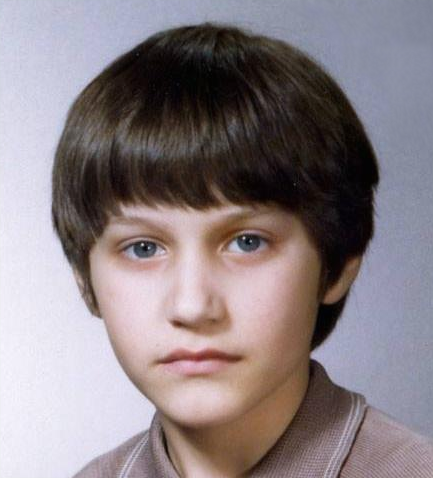

In [4]:
# Llamar a la función para pedir el archivo y obtener el path almacenado
#ruta = subir_imagen()

!wget https://raw.githubusercontent.com/FranPuentes/iTI2024/main/media/joven.png -O joven.png
ruta="joven.png"

imagen = leer_imagen(ruta)

# Mostrar la imagen original
cv2_imshow(imagen)

## Usando filtros

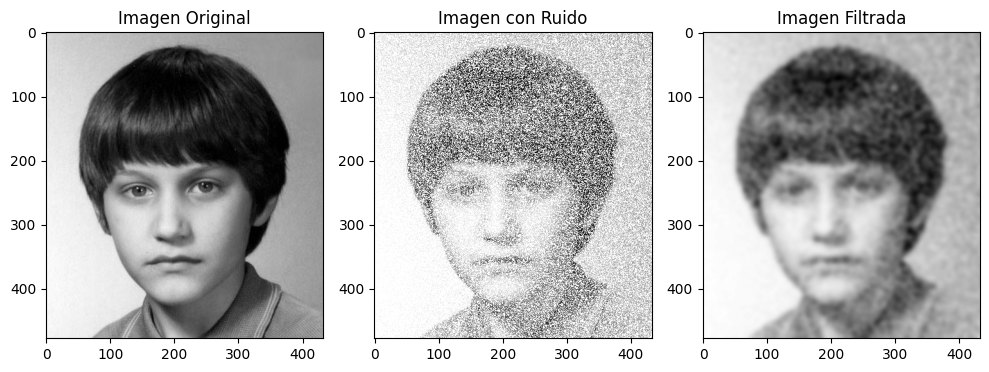

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB);
imagen_bw  = cv2.cvtColor(imagen_rgb, cv2.COLOR_BGR2GRAY)

# Agregar ruido a la imagen (simulación)
noise = np.random.normal(0, 25, imagen_bw.shape).astype(np.uint8)
imagen_con_ruido = cv2.add(imagen_bw, noise)

filtered_image = imagen_con_ruido.copy();

# Aplicar filtro de suavizado (blur) para reducir el ruido
for _ in range(10):
    filtered_image = cv2.GaussianBlur(filtered_image, (5, 5), 0)

filtered_image = cv2.bilateralFilter(filtered_image, d=9, sigmaColor=75, sigmaSpace=75)

# Mostrar la imagen original con ruido y la filtrada
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(imagen_bw, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 3, 2)
plt.imshow(imagen_con_ruido, cmap='gray')
plt.title('Imagen con Ruido')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Imagen Filtrada')

plt.tight_layout()
plt.show()


## Mejorando el contraste

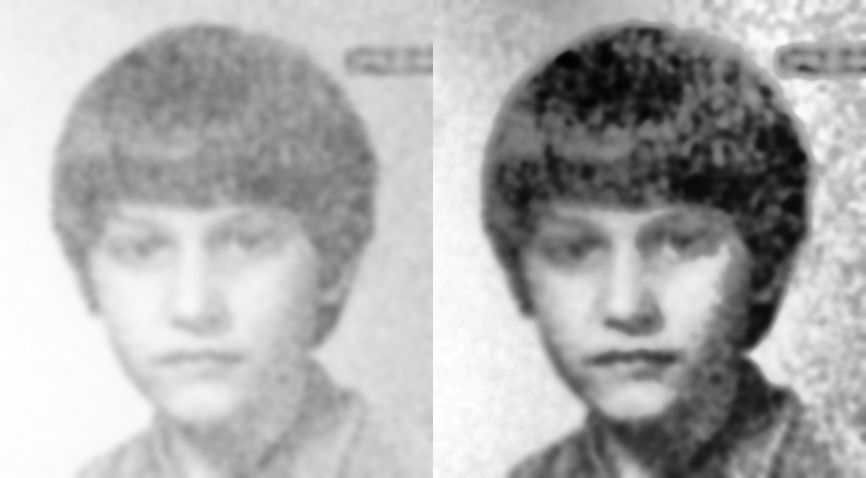

In [ ]:
# Applying CLAHE to L-channel
# feel free to try different values for the limit and grid size:
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(2,2))
cl = clahe.apply(filtered_image)

# Converting image from LAB Color model to BGR color spcae
enhanced_img = cl

# Stacking the original image with the enhanced image
result = np.hstack((filtered_image, enhanced_img))
cv2_imshow(result)